# Enron Dataset Exploration

First import necessary modules, load in the data, convert to dataframe and take a look at first few rows

In [1]:
#import sys
import pickle
import pandas as pd
#from feature_format import featureFormat, targetFeatureSplit
#from tester import test_classifier, dump_classifier_and_data

data_dict = pickle.load(open("final_project_dataset.pkl", "r") )
df = pd.DataFrame.from_dict(data_dict, orient='index')
print df.head(3)

                    salary to_messages deferral_payments total_payments  \
ALLEN PHILLIP K     201955        2902           2869717        4484442   
BADUM JAMES P          NaN         NaN            178980         182466   
BANNANTINE JAMES M     477         566               NaN         916197   

                   exercised_stock_options    bonus restricted_stock  \
ALLEN PHILLIP K                    1729541  4175000           126027   
BADUM JAMES P                       257817      NaN              NaN   
BANNANTINE JAMES M                 4046157      NaN          1757552   

                   shared_receipt_with_poi restricted_stock_deferred  \
ALLEN PHILLIP K                       1407                   -126027   
BADUM JAMES P                          NaN                       NaN   
BANNANTINE JAMES M                     465                   -560222   

                   total_stock_value           ...           loan_advances  \
ALLEN PHILLIP K              1729541       

Determin number of samples and features

In [2]:
print df.shape
df.dtypes

(146, 21)


salary                       object
to_messages                  object
deferral_payments            object
total_payments               object
exercised_stock_options      object
bonus                        object
restricted_stock             object
shared_receipt_with_poi      object
restricted_stock_deferred    object
total_stock_value            object
expenses                     object
loan_advances                object
from_messages                object
other                        object
from_this_person_to_poi      object
poi                            bool
director_fees                object
deferred_income              object
long_term_incentive          object
email_address                object
from_poi_to_this_person      object
dtype: object

Looks like I have 146 samples, which in this case should refer to people at Enron, and 21 features. Since 'poi' is the target label, I actually have only 20 features. These should be numbers, not objects, so I'll fix that. 

In [3]:
df = df.convert_objects(convert_numeric=True)
df.dtypes

salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
exercised_stock_options      float64
bonus                        float64
restricted_stock             float64
shared_receipt_with_poi      float64
restricted_stock_deferred    float64
total_stock_value            float64
expenses                     float64
loan_advances                float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
poi                             bool
director_fees                float64
deferred_income              float64
long_term_incentive          float64
email_address                 object
from_poi_to_this_person      float64
dtype: object

In [182]:
data_dict.keys()

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

Hmmm, 'THE TRAVEL AGENCY IN THE PARK' and 'TOTAL' look suspicious

In [186]:
df.ix['THE TRAVEL AGENCY IN THE PARK']

salary                          NaN
to_messages                     NaN
deferral_payments               NaN
total_payments               362096
exercised_stock_options         NaN
bonus                           NaN
restricted_stock                NaN
shared_receipt_with_poi         NaN
restricted_stock_deferred       NaN
total_stock_value               NaN
expenses                        NaN
loan_advances                   NaN
from_messages                   NaN
other                        362096
from_this_person_to_poi         NaN
poi                           False
director_fees                   NaN
deferred_income                 NaN
long_term_incentive             NaN
email_address                   NaN
from_poi_to_this_person         NaN
Name: THE TRAVEL AGENCY IN THE PARK, dtype: object

In [187]:
df.ix['TOTAL']

salary                       2.670423e+07
to_messages                           NaN
deferral_payments             3.20834e+07
total_payments               3.098866e+08
exercised_stock_options       3.11764e+08
bonus                        9.734362e+07
restricted_stock             1.303223e+08
shared_receipt_with_poi               NaN
restricted_stock_deferred        -7576788
total_stock_value            4.345095e+08
expenses                          5235198
loan_advances                  8.3925e+07
from_messages                         NaN
other                        4.266759e+07
from_this_person_to_poi               NaN
poi                                 False
director_fees                     1398517
deferred_income             -2.799289e+07
long_term_incentive          4.852193e+07
email_address                         NaN
from_poi_to_this_person               NaN
Name: TOTAL, dtype: object

should delete both

I'll take a quick look at some basic stats for each feature.

In [18]:
df.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,95.000000,86.000000,39.000000,1.250000e+02,1.020000e+02,82.000000,1.100000e+02,86.000000,18.000000,1.260000e+02,95.000000,4.0000,86.000000,93.000000,86.000000,146,17.000000,49.000000,66.000000,86.000000
mean,562194.294737,2073.860465,1642674.153846,5.081526e+06,5.987054e+06,2374234.609756,2.321741e+06,1176.465116,166410.555556,6.773957e+06,108728.915789,41962500.0000,608.790698,919064.967742,41.232558,0.1232877,166804.882353,-1140475.142857,1470361.454545,64.895349
std,2716369.154553,2582.700981,5161929.973575,2.906172e+07,3.106201e+07,10713327.969046,1.251828e+07,1178.317641,4201494.314703,3.895777e+07,533534.814109,47083208.7019,1841.033949,4589252.907638,100.073111,0.3298989,319891.409747,4025406.378506,5942759.315498,86.979244
min,477.000000,57.000000,-102500.000000,1.480000e+02,3.285000e+03,70000.000000,-2.604490e+06,2.000000,-7576788.000000,-4.409300e+04,148.000000,400000.0000,12.000000,2.000000,0.000000,False,3285.000000,-27992891.000000,69223.000000,0.000000
25%,211816.000000,541.250000,81573.000000,3.944750e+05,5.278862e+05,431250.000000,2.540180e+05,249.750000,-389621.750000,4.945102e+05,22614.000000,1600000.0000,22.750000,1215.000000,1.000000,0,98784.000000,-694862.000000,281250.000000,10.000000
50%,259996.000000,1211.000000,227449.000000,1.101393e+06,1.310814e+06,769375.000000,4.517400e+05,740.500000,-146975.000000,1.102872e+06,46950.000000,41762500.0000,41.000000,52382.000000,8.000000,0,108579.000000,-159792.000000,442035.000000,35.000000
75%,312117.000000,2634.750000,1002671.500000,2.093263e+06,2.547724e+06,1200000.000000,1.002370e+06,1888.250000,-75009.750000,2.949847e+06,79952.500000,82125000.0000,145.500000,362096.000000,24.750000,0,113784.000000,-38346.000000,938672.000000,72.250000
max,26704229.000000,15149.000000,32083396.000000,3.098866e+08,3.117640e+08,97343619.000000,1.303223e+08,5521.000000,15456290.000000,4.345095e+08,5235198.000000,83925000.0000,14368.000000,42667589.000000,609.000000,True,1398517.000000,-833.000000,48521928.000000,528.000000


A few things strike me here:
- many features have missing values
- some features have a negative minimum value which I am not sure is possible
- some features have a very large spread between the min and the max values

For example, I'll take a look at features that have a negative minimum. 

In [7]:
df[ df['restricted_stock'] < 0]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
BHATNAGAR SANJAY,NaN,523,NaN,15456290,2604490,NaN,-2604490,463,15456290,NaN,...,NaN,29,137864,1,False,137864,NaN,NaN,sanjay.bhatnagar@enron.com,0


A cursory search to understand 'restricted_stock' leads me to believe, as reported in $ in the dataset, that these values should not be negative. This is somewhat supported by the fact that only one person has a negative value (out of 112 reporting). Given that the absolute value of Bhatnagar Sanjay's 'restricted_stock' is close to the current mean, I am going to treat this number as positive and leave it in the dataset.

EDIT: given equation discussed below I will treat this as a NaN

In [9]:
df[ df['deferral_payments'] < 0 ]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
BELFER ROBERT,NaN,NaN,-102500,102500,3285,NaN,NaN,NaN,44093,-44093,...,NaN,NaN,NaN,NaN,False,3285,NaN,NaN,NaN,NaN


There seem to be situations where a deferral payment can be negative so I will leave this as is.

In [11]:
df[ df['restricted_stock_deferred'] < 0 ]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN
CARTER REBECCA C,261809,312,NaN,477557,NaN,300000,307301,196,-307301,NaN,...,NaN,15,540,7,False,NaN,-159792,75000,rebecca.carter@enron.com,29
CHAN RONNIE,NaN,NaN,NaN,NaN,NaN,NaN,32460,NaN,-32460,NaN,...,NaN,NaN,NaN,NaN,False,98784,-98784,NaN,NaN,NaN
CLINE KENNETH W,NaN,NaN,NaN,NaN,NaN,NaN,662086,NaN,-472568,189518,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
DERRICK JR. JAMES V,492375,2181,NaN,550981,8831913,800000,1787380,1401,-1787380,8831913,...,NaN,909,7482,20,False,NaN,-1284000,484000,james.derrick@enron.com,64
DETMERING TIMOTHY J,210500,NaN,875307,1204583,2027865,425000,315068,NaN,-315068,2027865,...,NaN,NaN,1105,NaN,False,NaN,-775241,415657,timothy.detmering@enron.com,NaN
GATHMANN WILLIAM D,NaN,NaN,NaN,NaN,1753766,NaN,264013,NaN,-72419,1945360,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
HAEDICKE MARK E,374125,4009,2157527,3859065,608750,1150000,524169,1847,-329825,803094,...,NaN,1941,52382,61,False,NaN,-934484,983346,mark.haedicke@enron.com,180


Here we have 15 negative values out of the 17 people reporting this value (removing 'TOTAL' from the count) so I will leave these as is. With only 17 values out of 145, I suspect this feature should be removed.

In [181]:
df[ df['restricted_stock_deferred'] > 0 ]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
BELFER ROBERT,NaN,NaN,-102500,102500,3285,NaN,NaN,NaN,44093,-44093,...,NaN,NaN,NaN,NaN,False,3285,NaN,NaN,NaN,NaN
BHATNAGAR SANJAY,NaN,523,NaN,15456290,2604490,NaN,-2604490,463,15456290,NaN,...,NaN,29,137864,1,False,137864,NaN,NaN,sanjay.bhatnagar@enron.com,0


In [46]:
df[ ['restricted_stock_deferred']].isnull().sum() / df.shape[0]

restricted_stock_deferred    0.876712
dtype: float64

In [32]:
df[ df['restricted_stock_deferred'].notnull() ].poi.sum() #df.ix[: ,['restricted_stock_deferred', 'poi' ] ].poi

0

So, 88.7% of 'restricted_stock_deferred' values are missing and those that are present only represent people that are not persons of interest. As expected, I will remove this feature. 

In [33]:
df[ df['total_stock_value'] < 0]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
BELFER ROBERT,NaN,NaN,-102500,102500,3285,NaN,NaN,NaN,44093,-44093,...,NaN,NaN,NaN,NaN,False,3285,NaN,NaN,NaN,NaN


'total_stock_value'  can't be negative so I will change this to a positive.

EDIT: from equation below it would imply that simply changing this to a positive would violate the assumption that 'restricted_stock' must be positive. Thus, I will assume this value to be NaN instead.

In [34]:
df[ df['deferred_income'] < 0]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN
BELDEN TIMOTHY N,213999,7991,2144013,5501630,953136,5249999,157569,5521,NaN,1110705,...,NaN,484,210698,108,True,NaN,-2334434,NaN,tim.belden@enron.com,228
BERGSIEKER RICHARD P,187922,383,NaN,618850,NaN,250000,659249,233,NaN,659249,...,NaN,59,427316,0,False,NaN,-485813,180250,rick.bergsieker@enron.com,4
BLAKE JR. NORMAN P,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,113784,-113784,NaN,NaN,NaN
BOWEN JR RAYMOND M,278601,1858,NaN,2669589,NaN,1350000,252055,1593,NaN,252055,...,NaN,27,1621,15,True,NaN,-833,974293,raymond.bowen@enron.com,140
BUTTS ROBERT H,261516,NaN,NaN,1271582,NaN,750000,417619,NaN,NaN,417619,...,NaN,NaN,150656,NaN,False,NaN,-75000,175000,bob.butts@enron.com,NaN
BUY RICHARD B,330546,3523,649584,2355702,2542813,900000,901657,2333,NaN,3444470,...,NaN,1053,400572,71,False,NaN,-694862,769862,rick.buy@enron.com,156


I believe 'deferred_income' being negative means the person is owed income that has not been paid yet, so I will leave these as is. 

Next I'll consider the count and % of missing values for each feature.

In [158]:
print df.isnull().sum()
print
print df.isnull().sum().sum()
print
print df.isnull().sum() / df.shape[0]

salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       60
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                  0
from_poi_to_this_person       60
dtype: int64

1323

salary                       0.349315
to_messages                  0.410959
deferral_payments            0.732877
total_payments               0.143836
exercised_stock_options      0.301370
bonus                        0.438356
restricted_stock             0.246575
shared_receipt_with_p

Now I'll consider the total number of persons of interest in the dataset and subsequently how many 'poi'==True are present for each feature once NaN's for that feature are removed. 

In [48]:
df['poi'].sum()

18

In [49]:
df_no_nan_salary = df[ pd.notnull(df['salary'])]
print df_no_nan_salary['poi'].sum()
print df_no_nan_salary.shape

17
(95, 21)


In [50]:
df_no_nan_to_messages = df[ pd.notnull(df['to_messages'])]
print df_no_nan_to_messages['poi'].sum()
print df_no_nan_to_messages.shape

14
(86, 21)


In [51]:
df_no_nan_deferral_payments = df[ pd.notnull(df['deferral_payments'])]
print df_no_nan_deferral_payments['poi'].sum()
print df_no_nan_deferral_payments.shape

5
(39, 21)


In [52]:
df_no_nan_total_payments = df[ pd.notnull(df['total_payments'])]
print df_no_nan_total_payments['poi'].sum()
print df_no_nan_total_payments.shape

18
(125, 21)


In [53]:
df_no_nan_exercised_stock_options = df[ pd.notnull(df['exercised_stock_options'])]
print df_no_nan_exercised_stock_options['poi'].sum()
print df_no_nan_exercised_stock_options.shape

12
(102, 21)


In [54]:
df_no_nan_bonus = df[ pd.notnull(df['bonus'])]
print df_no_nan_bonus['poi'].sum()
print df_no_nan_bonus.shape

16
(82, 21)


In [55]:
df_no_nan_restricted_stock = df[ pd.notnull(df['restricted_stock'])]
print df_no_nan_restricted_stock['poi'].sum()
print df_no_nan_restricted_stock.shape

17
(110, 21)


In [56]:
df_no_nan_shared_receipt_with_poi = df[ pd.notnull(df['shared_receipt_with_poi'])]
print df_no_nan_shared_receipt_with_poi['poi'].sum()
print df_no_nan_shared_receipt_with_poi.shape

14
(86, 21)


In [57]:
df_no_nan_restricted_stock_deferred = df[ pd.notnull(df['restricted_stock_deferred'])]
print df_no_nan_restricted_stock_deferred['poi'].sum()
print df_no_nan_restricted_stock_deferred.shape

0
(18, 21)


In [58]:
df_no_nan_total_stock_value = df[ pd.notnull(df['total_stock_value'])]
print df_no_nan_total_stock_value['poi'].sum()
print df_no_nan_total_stock_value.shape

18
(126, 21)


In [59]:
df_no_nan_expenses = df[ pd.notnull(df['expenses'])]
print df_no_nan_expenses['poi'].sum()
print df_no_nan_expenses.shape

18
(95, 21)


In [60]:
df_no_nan_loan_advances = df[ pd.notnull(df['loan_advances'])]
print df_no_nan_loan_advances['poi'].sum()
print df_no_nan_loan_advances.shape

1
(4, 21)


In [61]:
df_no_nan_from_messages = df[ pd.notnull(df['from_messages'])]
print df_no_nan_from_messages['poi'].sum()
print df_no_nan_from_messages.shape

14
(86, 21)


In [62]:
df_no_nan_other = df[ pd.notnull(df['other'])]
print df_no_nan_other['poi'].sum()
print df_no_nan_other.shape

18
(93, 21)


In [63]:
df_no_nan_from_this_person_to_poi = df[ pd.notnull(df['from_this_person_to_poi'])]
print df_no_nan_from_this_person_to_poi['poi'].sum()
print df_no_nan_from_this_person_to_poi.shape

14
(86, 21)


In [64]:
df_no_nan_director_fees = df[ pd.notnull(df['director_fees'])]
print df_no_nan_director_fees['poi'].sum()
print df_no_nan_director_fees.shape

0
(17, 21)


In [65]:
df_no_nan_deferred_income = df[ pd.notnull(df['deferred_income'])]
print df_no_nan_deferred_income['poi'].sum()
print df_no_nan_deferred_income.shape

11
(49, 21)


In [66]:
df_no_nan_long_term_incentive = df[ pd.notnull(df['long_term_incentive'])]
print df_no_nan_long_term_incentive['poi'].sum()
print df_no_nan_long_term_incentive.shape

12
(66, 21)


In [67]:
df_no_nan_from_poi_to_this_person = df[ pd.notnull(df['from_poi_to_this_person'])]
print df_no_nan_from_poi_to_this_person['poi'].sum()
print df_no_nan_from_poi_to_this_person.shape

14
(86, 21)


In [75]:
df_no_nan = df.dropna(axis=0)
print df_no_nan['poi'].sum()
print df_no_nan.shape

0
(0, 21)


For removal, I will draw the line roughly around 75% for missing values and about 12% (similar to 18/145 for total dataset) for 'poi'==True for the non-NaN subset for each feature. 

For missing values, this highlights the following features for removal:
- deferral payments
- restricted_stock_deferred
- loan_advances
- director_fees

For 'poi'==True balance, this highlights the following features for removal:
- restricted_stock_deferred
- director_fees

Putting this together, and noting the very high % of missing values for 'loan_advances', I will remove the following features:
- restricted_stock_deferred
- director_fees
- loan_advances


I now want to check for possible redundancy in some of the features.

In [143]:
df_stock = df[ ['restricted_stock_deferred', 'exercised_stock_options', 'restricted_stock', 'total_stock_value'] ]
df_stock = df_stock.dropna()
df_stock.exercised_stock_options + df_stock.restricted_stock + df_stock.restricted_stock_deferred == df_stock.total_stock_value

ALLEN PHILLIP K        True
BANNANTINE JAMES M     True
DERRICK JR. JAMES V    True
DETMERING TIMOTHY J    True
GATHMANN WILLIAM D     True
HAEDICKE MARK E        True
JAEDICKE ROBERT        True
LOWRY CHARLES P        True
PIPER GREGORY F        True
REYNOLDS LAWRENCE      True
TOTAL                  True
dtype: bool

This implies that not all 4 of these features are independent as I only need 3 of the values and will then know the 4th. At this point, I am not sure if linear independence of features is a problem for classification in the same way it is for regression. Aside from that, however, this relationship could be used to calculate missing values from the dataset. 

In [76]:
%matplotlib inline
from ggplot import *

In [77]:
print df.columns

Index([u'salary', u'to_messages', u'deferral_payments', u'total_payments',
       u'exercised_stock_options', u'bonus', u'restricted_stock',
       u'shared_receipt_with_poi', u'restricted_stock_deferred',
       u'total_stock_value', u'expenses', u'loan_advances', u'from_messages',
       u'other', u'from_this_person_to_poi', u'poi', u'director_fees',
       u'deferred_income', u'long_term_incentive', u'email_address',
       u'from_poi_to_this_person'],
      dtype='object')


Further exploration of outlier values.

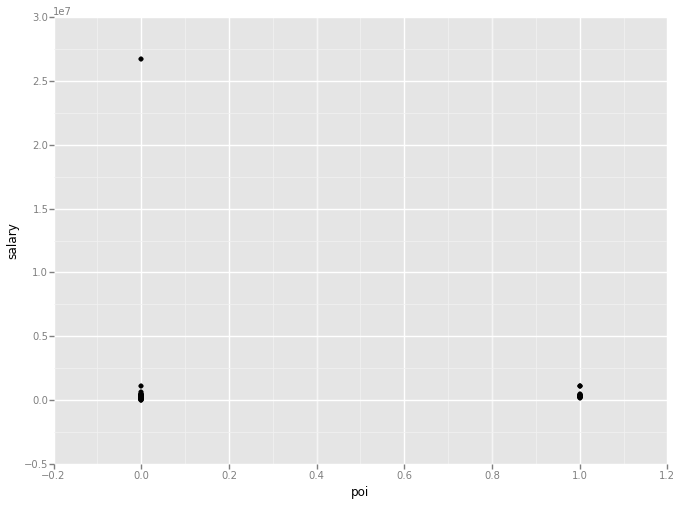

<ggplot: (8806744)>

In [78]:
ggplot(aes(x='poi', y='salary'), data=df) + geom_point()


In [79]:
df_salary_outlier = df[ df['salary'] > 1e7 ]
df_salary_outlier

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
TOTAL,26704229,NaN,32083396,309886585,311764000,97343619,130322299,NaN,-7576788,434509511,...,83925000,NaN,42667589,NaN,False,1398517,-27992891,48521928,NaN,NaN


In [80]:
df['salary'].ix[0:(df.shape[0] - 1)].sum()

53408458.0

In [81]:
df['salary']

ALLEN PHILLIP K                    201955
BADUM JAMES P                         NaN
BANNANTINE JAMES M                    477
BAXTER JOHN C                      267102
BAY FRANKLIN R                     239671
BAZELIDES PHILIP J                  80818
BECK SALLY W                       231330
BELDEN TIMOTHY N                   213999
BELFER ROBERT                         NaN
BERBERIAN DAVID                    216582
BERGSIEKER RICHARD P               187922
BHATNAGAR SANJAY                      NaN
BIBI PHILIPPE A                    213625
BLACHMAN JEREMY M                  248546
BLAKE JR. NORMAN P                    NaN
BOWEN JR RAYMOND M                 278601
BROWN MICHAEL                         NaN
BUCHANAN HAROLD G                  248017
BUTTS ROBERT H                     261516
BUY RICHARD B                      330546
CALGER CHRISTOPHER F               240189
CARTER REBECCA C                   261809
CAUSEY RICHARD A                   415189
CHAN RONNIE                       

In [82]:
df_no_salary_outlier = df[ df['salary'] < 2e7]

In [83]:
df_no_salary_outlier['salary'].sum()

26704229.0

I need to remove 'TOTAL' from the dataset as this is just a sum of values for all the people in the dataset and is not connected to a person

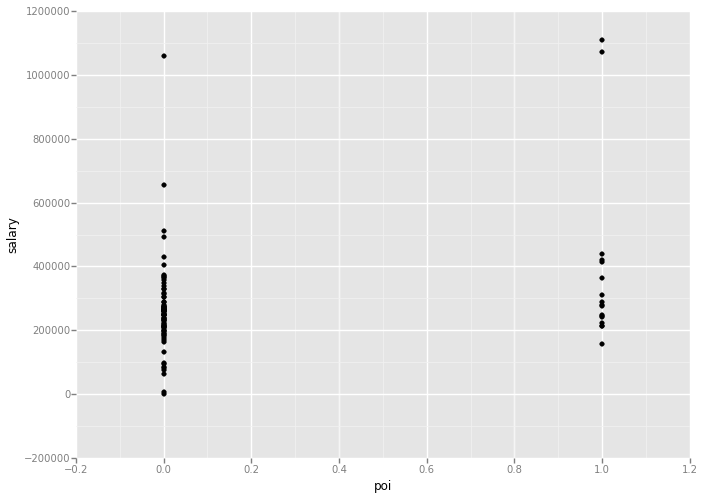

<ggplot: (17517365)>

In [84]:
ggplot(aes(x='poi', y='salary'), data=df_no_salary_outlier) + geom_point()


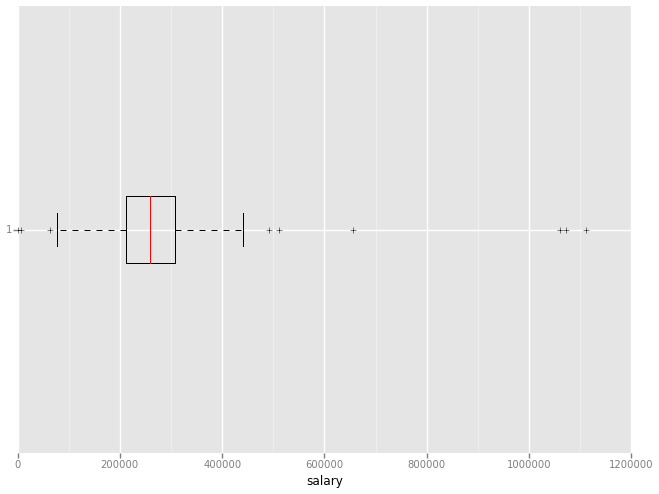

<ggplot: (19259722)>

In [164]:
ggplot(aes(x='salary'), data=df_no_salary_outlier) + geom_boxplot()


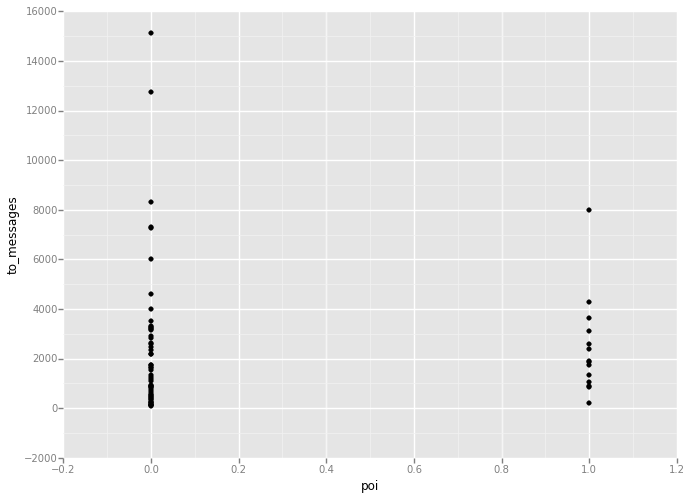

<ggplot: (13977965)>

In [85]:
ggplot(aes(x='poi', y='to_messages'), data=df_no_salary_outlier) + geom_point()


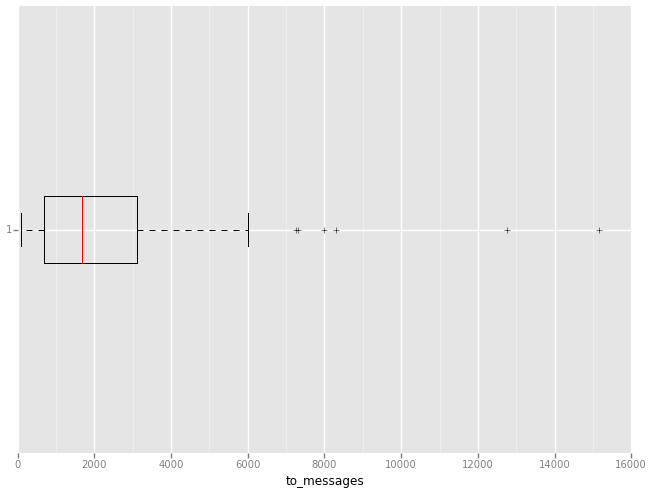

<ggplot: (17533391)>

In [165]:
ggplot(aes(x='to_messages'), data=df_no_salary_outlier) + geom_boxplot()

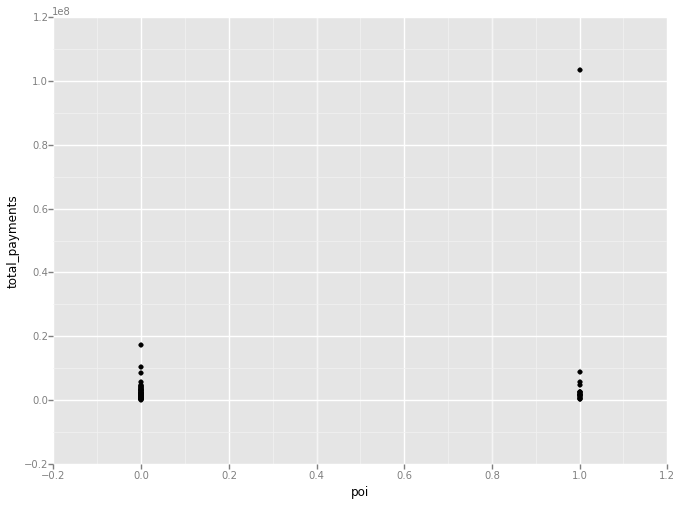

<ggplot: (13978035)>

In [86]:
ggplot(aes(x='poi', y='total_payments'), data=df_no_salary_outlier) + geom_point()


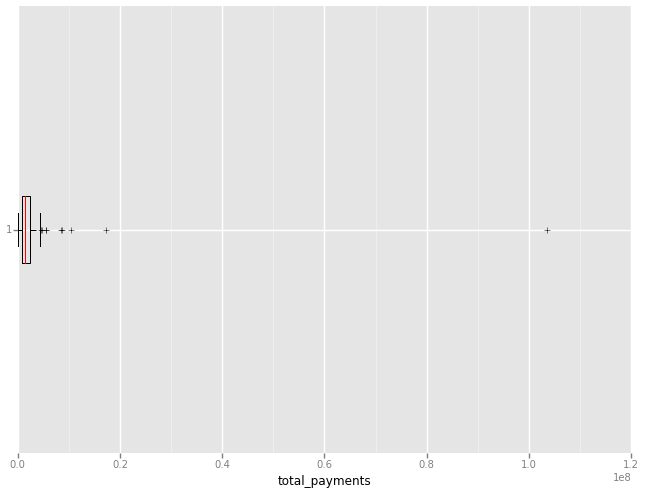

<ggplot: (17803910)>

In [166]:
ggplot(aes(x='total_payments'), data=df_no_salary_outlier) + geom_boxplot()

In [87]:
df_total_payment_outliers = df_no_salary_outlier[ df_no_salary_outlier['total_payments'] > 1e8 ]
df_total_payment_outliers

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
LAY KENNETH L,1072321,4273,202911,103559793,34348384,7000000,14761694,2411,NaN,49110078,...,81525000,36,10359729,16,True,NaN,-300000,3600000,kenneth.lay@enron.com,123


Seems like a valid data point since it is connected to one of the prominent Enron names.

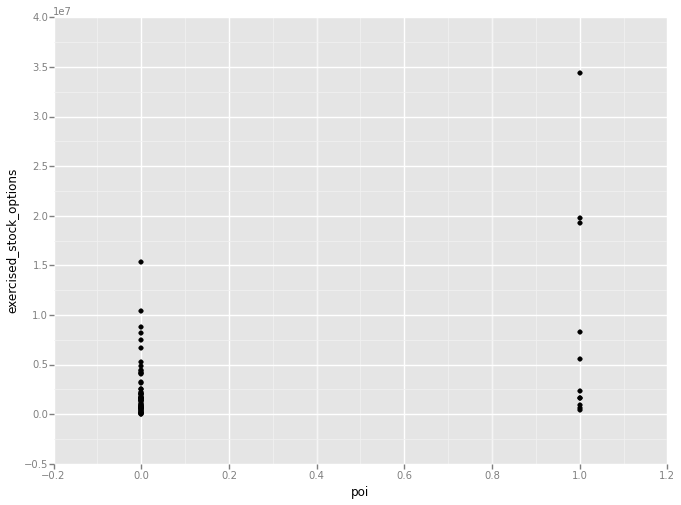

<ggplot: (13939011)>

In [88]:
ggplot(aes(x='poi', y='exercised_stock_options'), data=df_no_salary_outlier) + geom_point()

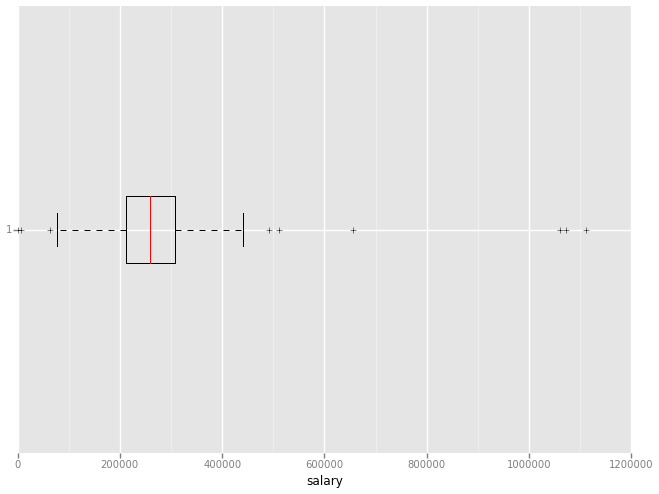

<ggplot: (17794985)>

In [167]:
ggplot(aes(x='salary'), data=df_no_salary_outlier) + geom_boxplot()

In [89]:
df_exercised_stock_options_outliers = df_no_salary_outlier[ df_no_salary_outlier['exercised_stock_options'] > 1.25e7 ]
df_exercised_stock_options_outliers

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
LAY KENNETH L,1072321,4273,202911,103559793,34348384,7000000,14761694,2411,NaN,49110078,...,81525000,36,10359729,16,True,NaN,-300000,3600000,kenneth.lay@enron.com,123
PAI LOU L,261879,NaN,NaN,3123383,15364167,1000000,8453763,NaN,NaN,23817930,...,NaN,NaN,1829457,NaN,False,NaN,NaN,NaN,lou.pai@enron.com,NaN
RICE KENNETH D,420636,905,NaN,505050,19794175,1750000,2748364,864,NaN,22542539,...,NaN,18,174839,4,True,NaN,-3504386,1617011,ken.rice@enron.com,42
SKILLING JEFFREY K,1111258,3627,NaN,8682716,19250000,5600000,6843672,2042,NaN,26093672,...,NaN,108,22122,30,True,NaN,NaN,1920000,jeff.skilling@enron.com,88


These seem to be valid data points again connected to some key figures. 

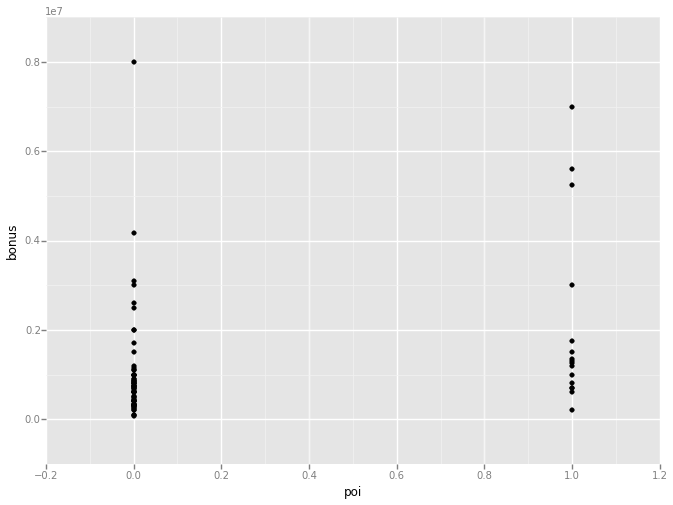

<ggplot: (17578195)>

In [90]:
ggplot(aes(x='poi', y='bonus'), data=df_no_salary_outlier) + geom_point()

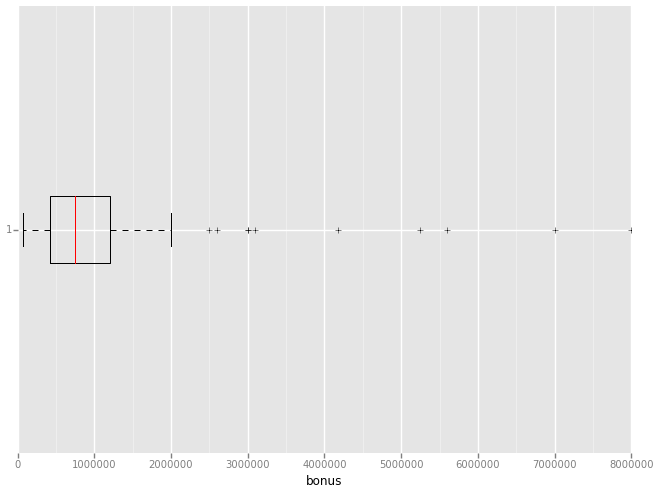

<ggplot: (19259785)>

In [168]:
ggplot(aes(x='bonus'), data=df_no_salary_outlier) + geom_boxplot()

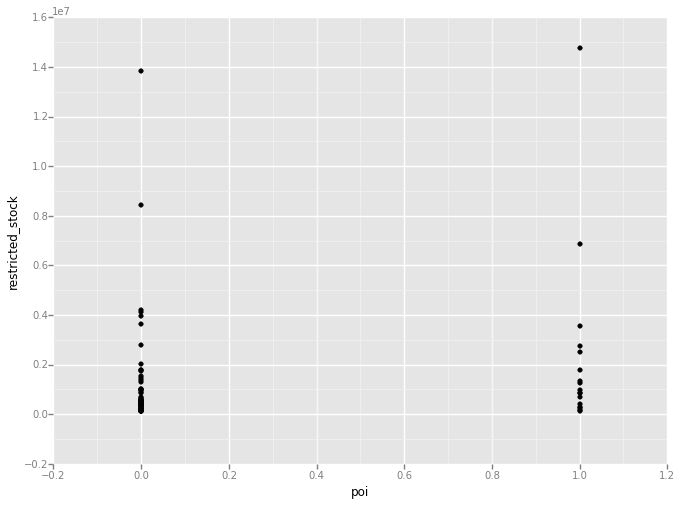

<ggplot: (18050487)>

In [91]:
ggplot(aes(x='poi', y='restricted_stock'), data=df_no_salary_outlier) + geom_point()

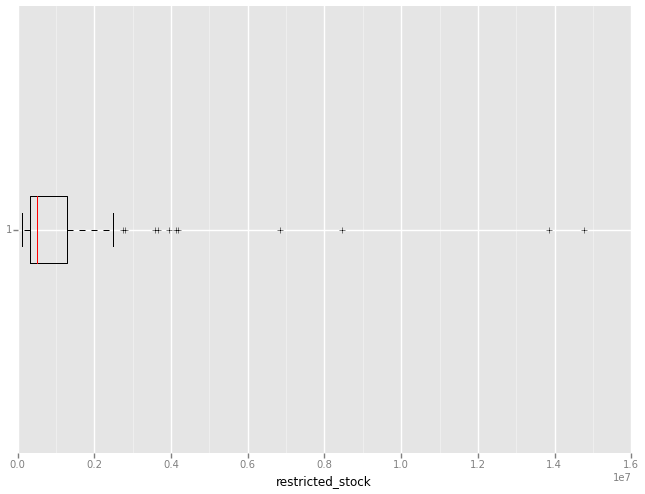

<ggplot: (17989545)>

In [169]:
ggplot(aes(x='restricted_stock'), data=df_no_salary_outlier) + geom_boxplot()

In [92]:
df_restricted_stock_outliers = df_no_salary_outlier[ df_no_salary_outlier['restricted_stock'] > 0.6e7 ]
df_restricted_stock_outliers

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
LAY KENNETH L,1072321,4273,202911,103559793,34348384,7000000,14761694,2411,NaN,49110078,...,81525000,36,10359729,16,True,NaN,-300000,3600000,kenneth.lay@enron.com,123
PAI LOU L,261879,NaN,NaN,3123383,15364167,1000000,8453763,NaN,NaN,23817930,...,NaN,NaN,1829457,NaN,False,NaN,NaN,NaN,lou.pai@enron.com,NaN
SKILLING JEFFREY K,1111258,3627,NaN,8682716,19250000,5600000,6843672,2042,NaN,26093672,...,NaN,108,22122,30,True,NaN,NaN,1920000,jeff.skilling@enron.com,88
WHITE JR THOMAS E,317543,NaN,NaN,1934359,1297049,450000,13847074,NaN,NaN,15144123,...,NaN,NaN,1085463,NaN,False,NaN,NaN,NaN,thomas.white@enron.com,NaN


Again, seems reasonable.

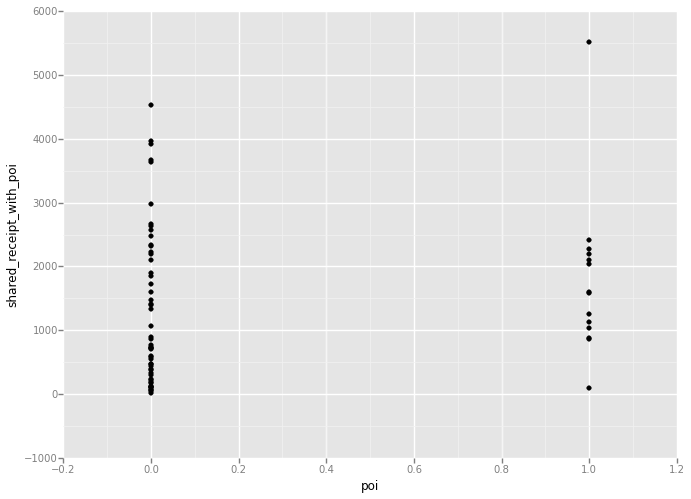

<ggplot: (17799908)>

In [93]:
ggplot(aes(x='poi', y='shared_receipt_with_poi'), data=df_no_salary_outlier) + geom_point()

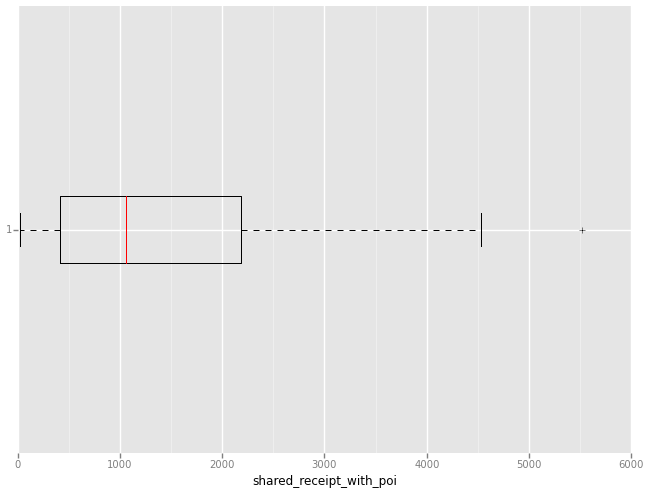

<ggplot: (17483030)>

In [170]:
ggplot(aes(x='shared_receipt_with_poi'), data=df_no_salary_outlier) + geom_boxplot()

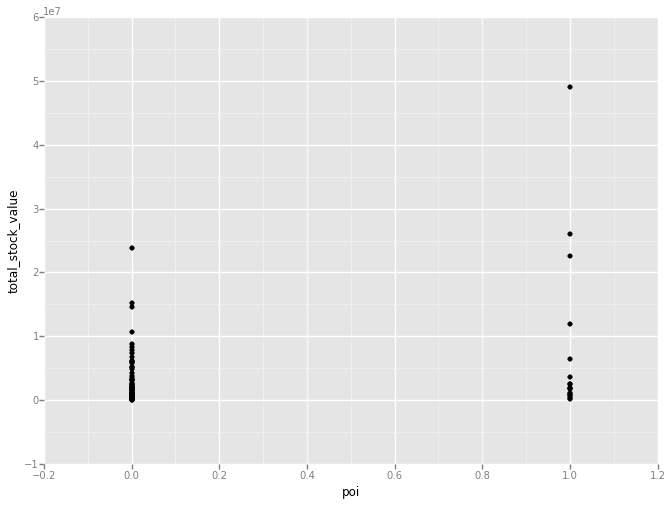

<ggplot: (17812260)>

In [94]:
ggplot(aes(x='poi', y='total_stock_value'), data=df_no_salary_outlier) + geom_point()

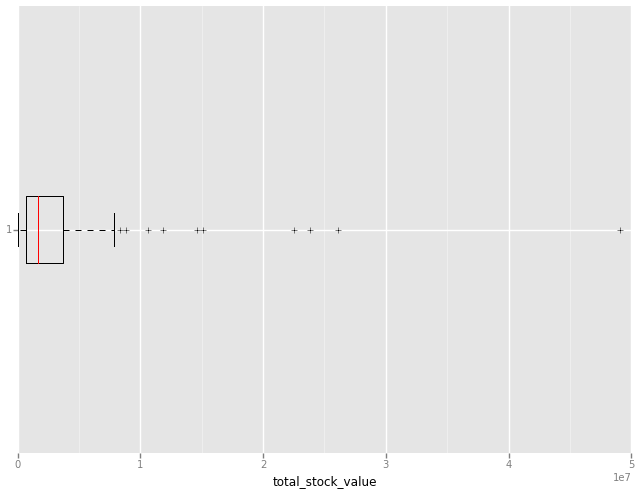

<ggplot: (17483208)>

In [171]:
ggplot(aes(x='total_stock_value'), data=df_no_salary_outlier) + geom_boxplot()

In [95]:
df_total_stock_value_outliers = df_no_salary_outlier[ df_no_salary_outlier['total_stock_value'] > 1.25e7 ]
df_total_stock_value_outliers

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
FREVERT MARK A,1060932,3275,6426990,17252530,10433518,2000000,4188667,2979,NaN,14622185,...,2000000,21,7427621,6,False,NaN,-3367011,1617011,mark.frevert@enron.com,242
LAY KENNETH L,1072321,4273,202911,103559793,34348384,7000000,14761694,2411,NaN,49110078,...,81525000,36,10359729,16,True,NaN,-300000,3600000,kenneth.lay@enron.com,123
PAI LOU L,261879,NaN,NaN,3123383,15364167,1000000,8453763,NaN,NaN,23817930,...,NaN,NaN,1829457,NaN,False,NaN,NaN,NaN,lou.pai@enron.com,NaN
RICE KENNETH D,420636,905,NaN,505050,19794175,1750000,2748364,864,NaN,22542539,...,NaN,18,174839,4,True,NaN,-3504386,1617011,ken.rice@enron.com,42
SKILLING JEFFREY K,1111258,3627,NaN,8682716,19250000,5600000,6843672,2042,NaN,26093672,...,NaN,108,22122,30,True,NaN,NaN,1920000,jeff.skilling@enron.com,88
WHITE JR THOMAS E,317543,NaN,NaN,1934359,1297049,450000,13847074,NaN,NaN,15144123,...,NaN,NaN,1085463,NaN,False,NaN,NaN,NaN,thomas.white@enron.com,NaN


Looks reasonable.

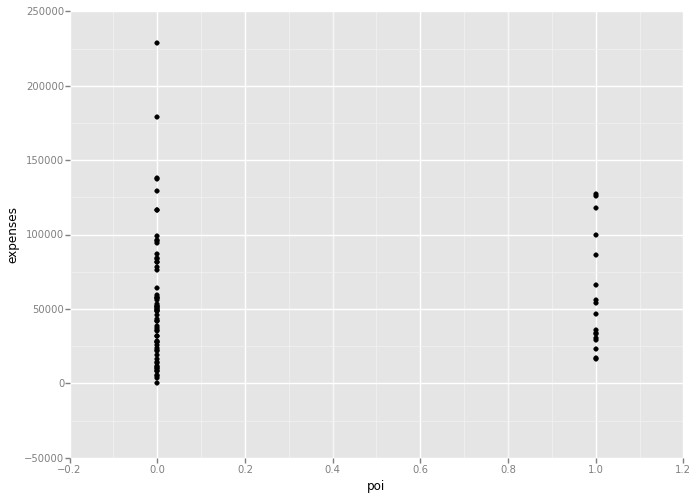

<ggplot: (13984839)>

In [96]:
ggplot(aes(x='poi', y='expenses'), data=df_no_salary_outlier) + geom_point()

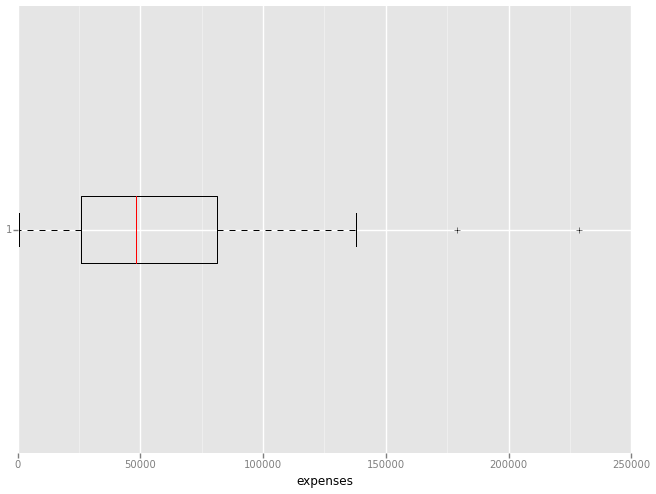

<ggplot: (17582487)>

In [172]:
ggplot(aes(x='expenses'), data=df_no_salary_outlier) + geom_boxplot()

In [98]:
df_expenses_outliers = df_no_salary_outlier[ df_no_salary_outlier['expenses'] > 150000 ]
df_expenses_outliers

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
MCCLELLAN GEORGE,263413,1744,NaN,1318763,506765,900000,441096,1469,NaN,947861,...,NaN,49,51587,0,False,NaN,-125000,NaN,george.mcclellan@enron.com,52
SHANKMAN JEFFREY A,304110,3221,NaN,3038702,1441898,2000000,630137,1730,NaN,2072035,...,NaN,2681,1191,83,False,NaN,NaN,554422,jeffrey.shankman@enron.com,94


Seems valid.

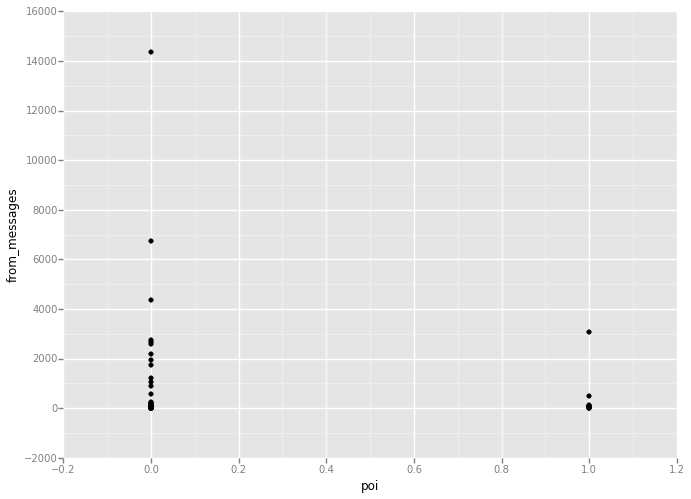

<ggplot: (20717060)>

In [97]:
ggplot(aes(x='poi', y='from_messages'), data=df_no_salary_outlier) + geom_point()

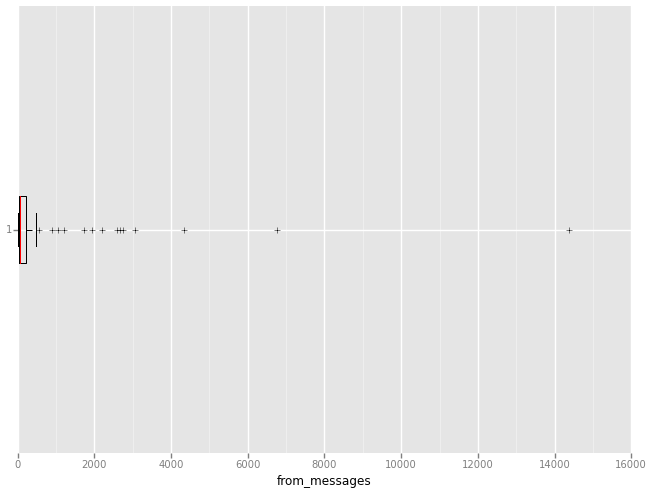

<ggplot: (17546276)>

In [173]:
ggplot(aes(x='from_messages'), data=df_no_salary_outlier) + geom_boxplot()

In [100]:
df_from_messages_outliers = df_no_salary_outlier[ df_no_salary_outlier['from_messages'] > 4000 ]
df_from_messages_outliers

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
BECK SALLY W,231330,7315,NaN,969068,NaN,700000,126027,2639,NaN,126027,...,NaN,4343,566,386,False,NaN,NaN,NaN,sally.beck@enron.com,144
KAMINSKI WINCENTY J,275101,4607,NaN,1086821,850010,400000,126027,583,NaN,976037,...,NaN,14368,4669,171,False,NaN,NaN,323466,vince.kaminski@enron.com,41
KEAN STEVEN J,404338,12754,NaN,1747522,2022048,1000000,4131594,3639,NaN,6153642,...,NaN,6759,1231,387,False,NaN,NaN,300000,steven.kean@enron.com,140


Plausible

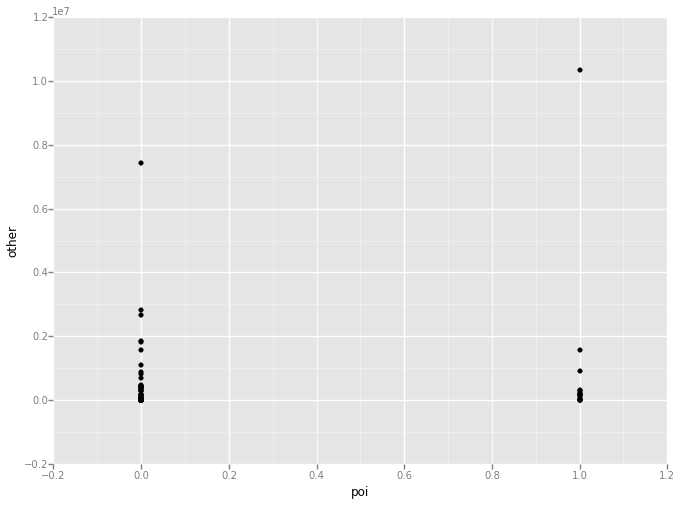

<ggplot: (17969503)>

In [101]:
ggplot(aes(x='poi', y='other'), data=df_no_salary_outlier) + geom_point()

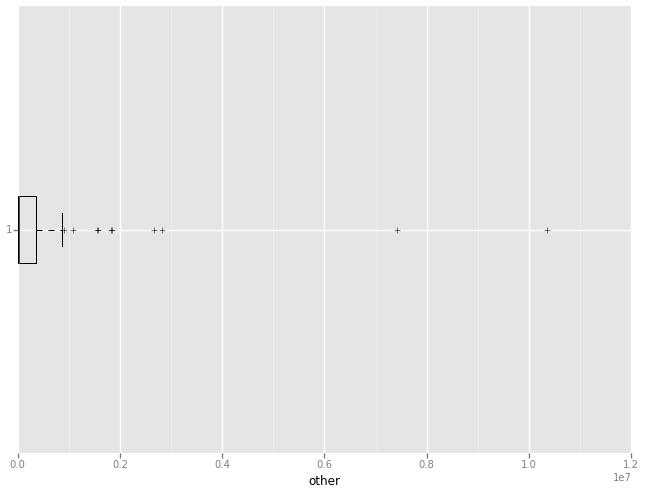

<ggplot: (17989513)>

In [174]:
ggplot(aes(x='other'), data=df_no_salary_outlier) + geom_boxplot()

In [103]:
df_other_outliers = df_no_salary_outlier[ df_no_salary_outlier['other'] > 0.4e7 ]
df_other_outliers

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
FREVERT MARK A,1060932,3275,6426990,17252530,10433518,2000000,4188667,2979,NaN,14622185,...,2000000,21,7427621,6,False,NaN,-3367011,1617011,mark.frevert@enron.com,242
LAY KENNETH L,1072321,4273,202911,103559793,34348384,7000000,14761694,2411,NaN,49110078,...,81525000,36,10359729,16,True,NaN,-300000,3600000,kenneth.lay@enron.com,123


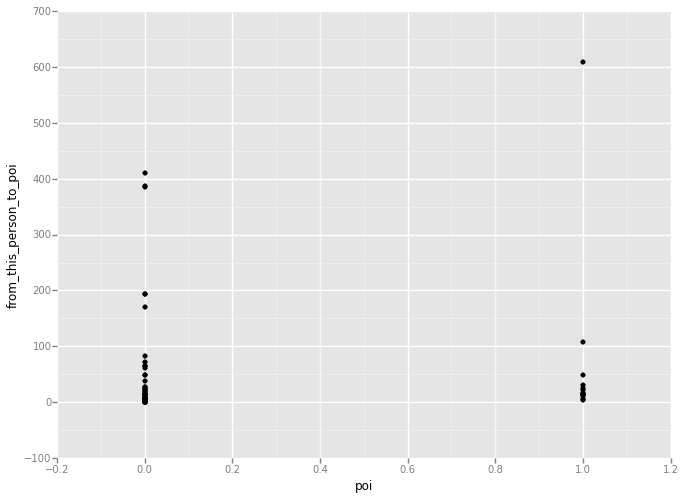

<ggplot: (17679147)>

In [99]:
ggplot(aes(x='poi', y='from_this_person_to_poi'), data=df_no_salary_outlier) + geom_point()

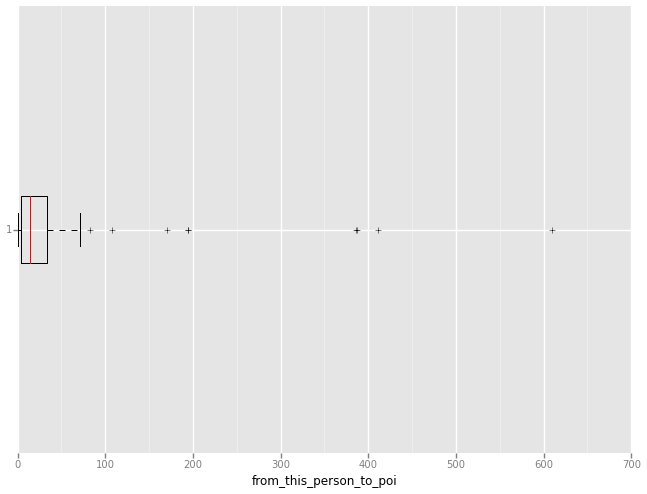

<ggplot: (19000889)>

In [175]:
ggplot(aes(x='from_this_person_to_poi'), data=df_no_salary_outlier) + geom_boxplot()

In keeping with the rest.

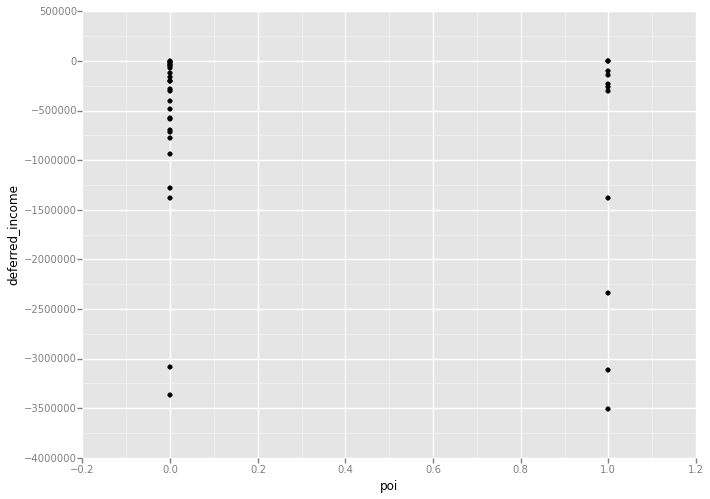

<ggplot: (13948118)>

In [104]:
ggplot(aes(x='poi', y='deferred_income'), data=df_no_salary_outlier) + geom_point()

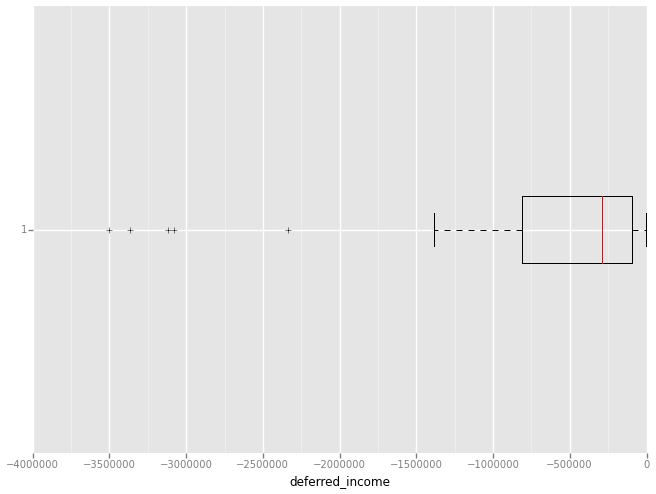

<ggplot: (18665609)>

In [176]:
ggplot(aes(x='deferred_income'), data=df_no_salary_outlier) + geom_boxplot()

In [105]:
df_deferred_income_outliers = df_no_salary_outlier[ df_no_salary_outlier['deferred_income'] < -2000000 ]
df_deferred_income_outliers

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BELDEN TIMOTHY N,213999,7991,2144013,5501630,953136,5249999,157569,5521,NaN,1110705,...,NaN,484,210698,108,True,NaN,-2334434,NaN,tim.belden@enron.com,228
FREVERT MARK A,1060932,3275,6426990,17252530,10433518,2000000,4188667,2979,NaN,14622185,...,2000000,21,7427621,6,False,NaN,-3367011,1617011,mark.frevert@enron.com,242
HANNON KEVIN P,243293,1045,NaN,288682,5538001,1500000,853064,1035,NaN,6391065,...,NaN,32,11350,21,True,NaN,-3117011,1617011,kevin.hannon@enron.com,32
RICE KENNETH D,420636,905,NaN,505050,19794175,1750000,2748364,864,NaN,22542539,...,NaN,18,174839,4,True,NaN,-3504386,1617011,ken.rice@enron.com,42


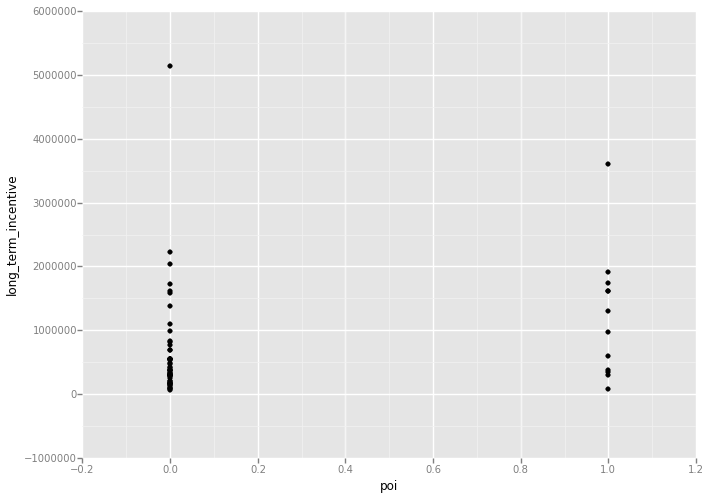

<ggplot: (17584297)>

In [106]:
ggplot(aes(x='poi', y='long_term_incentive'), data=df_no_salary_outlier) + geom_point()

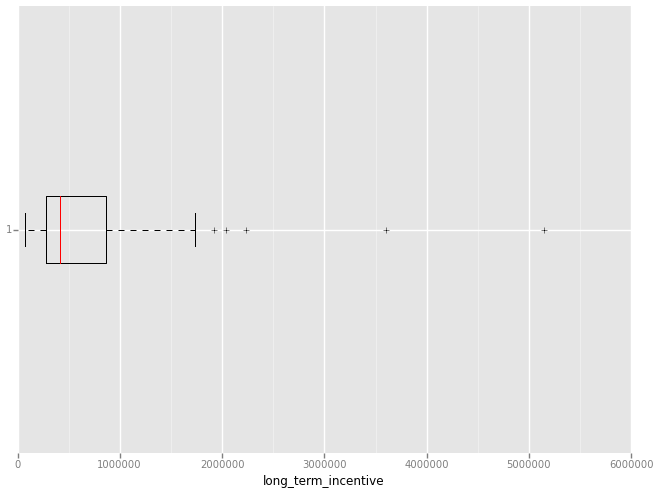

<ggplot: (17799926)>

In [177]:
ggplot(aes(x='long_term_incentive'), data=df_no_salary_outlier) + geom_boxplot()

In [107]:
df_long_term_incentive_outliers = df_no_salary_outlier[ df_no_salary_outlier['long_term_incentive'] > 3.0e6 ]
df_long_term_incentive_outliers

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
LAY KENNETH L,1072321,4273,202911,103559793,34348384,7000000,14761694,2411,NaN,49110078,...,81525000,36,10359729,16,True,NaN,-300000,3600000,kenneth.lay@enron.com,123
MARTIN AMANDA K,349487,1522,85430,8407016,2070306,NaN,NaN,477,NaN,2070306,...,NaN,230,2818454,0,False,NaN,NaN,5145434,a..martin@enron.com,8


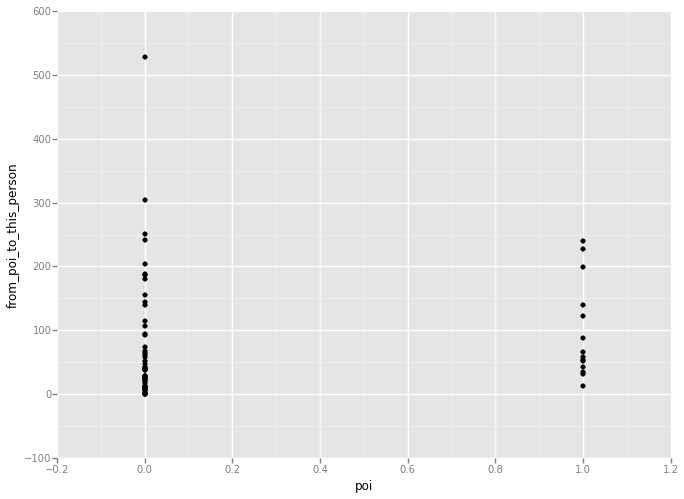

<ggplot: (17220296)>

In [108]:
ggplot(aes(x='poi', y='from_poi_to_this_person'), data=df_no_salary_outlier) + geom_point()

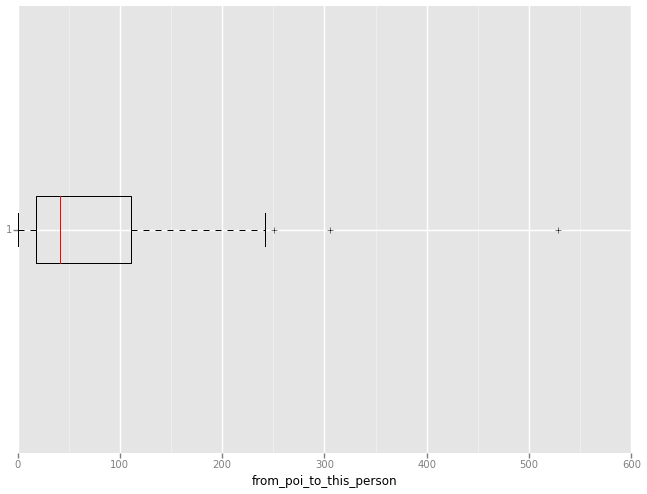

<ggplot: (17527177)>

In [178]:
ggplot(aes(x='from_poi_to_this_person'), data=df_no_salary_outlier) + geom_boxplot()

In [110]:
df_from_poi_to_this_person_outliers = df_no_salary_outlier[ df_no_salary_outlier['from_poi_to_this_person'] > 300 ]
df_from_poi_to_this_person_outliers

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
DIETRICH JANET R,250100,2572,NaN,1410464,1550019,600000,315068,1902,NaN,1865087,...,NaN,63,473,14,False,NaN,NaN,556416,janet.dietrich@enron.com,305
LAVORATO JOHN J,339288,7259,NaN,10425757,4158995,8000000,1008149,3962,NaN,5167144,...,NaN,2585,1552,411,False,NaN,NaN,2035380,john.lavorato@enron.com,528


Create new variable as ratio of messages to poi and total messages sent. 

In [112]:
df_no_salary_outlier.loc[:,'from_ratio'] = df_no_salary_outlier.from_this_person_to_poi / df_no_salary_outlier.from_messages

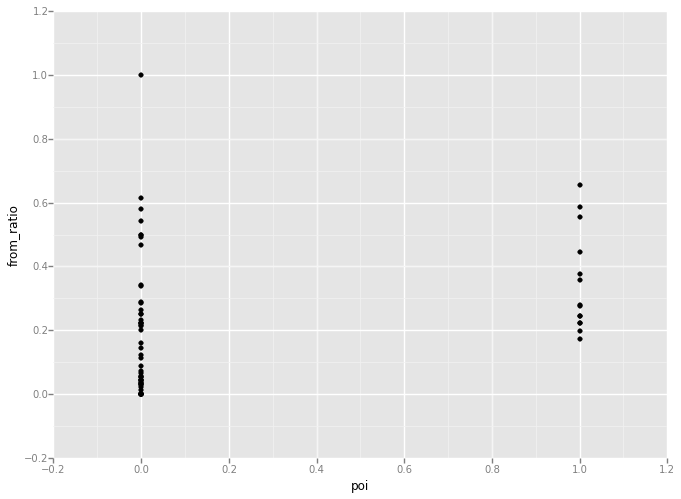

<ggplot: (17801360)>

In [113]:
ggplot(aes(x='poi', y='from_ratio'), data=df_no_salary_outlier) + geom_point()

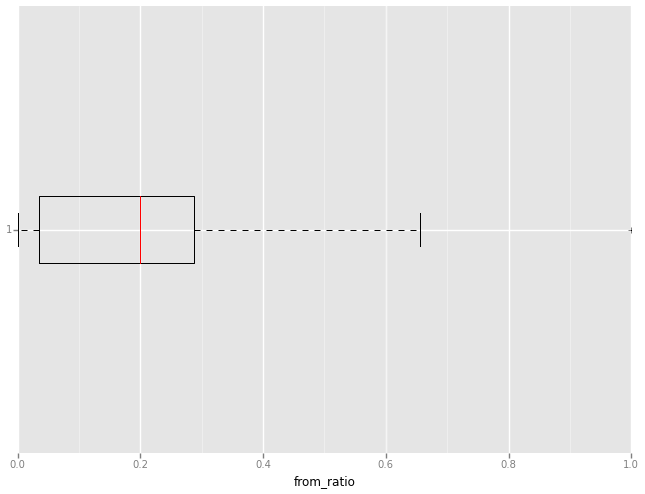

<ggplot: (17228488)>

In [179]:
ggplot(aes(x='from_ratio'), data=df_no_salary_outlier) + geom_boxplot()

Create new variable as ratio of messages from poi to total messages received.

In [114]:
df_no_salary_outlier.loc[:,'to_ratio'] = df_no_salary_outlier.from_poi_to_this_person / df_no_salary_outlier.to_messages

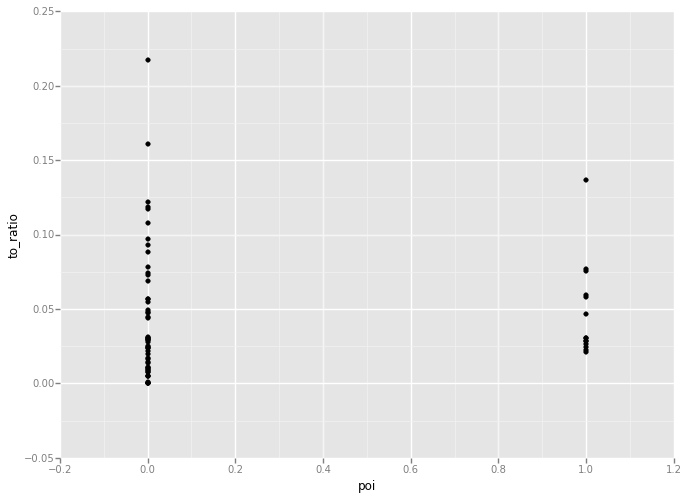

<ggplot: (18071588)>

In [115]:
ggplot(aes(x='poi', y='to_ratio'), data=df_no_salary_outlier) + geom_point()

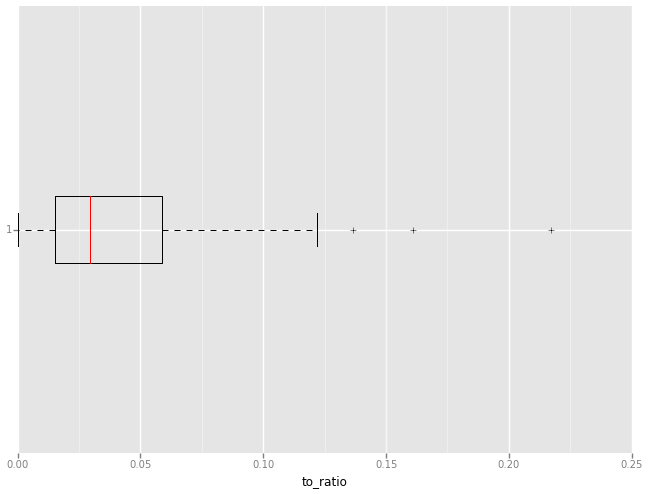

<ggplot: (18099814)>

In [180]:
ggplot(aes(x='to_ratio'), data=df_no_salary_outlier) + geom_boxplot()

Look at correlations between variables.

In [117]:
df_no_salary_outlier.corr(min_periods=50)

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person,from_ratio,to_ratio
salary,1.000000,0.187047,NaN,0.579260,0.607324,0.523190,0.550824,0.284995,NaN,0.614736,...,-0.003541,0.606903,0.021288,0.264976,NaN,NaN,0.484114,0.179055,0.004715,-0.130777
to_messages,0.187047,1.000000,NaN,0.131982,0.039041,0.372997,0.162399,0.841259,NaN,0.082392,...,0.456206,0.038211,0.547814,-0.001611,NaN,NaN,NaN,0.484216,-0.226026,-0.242492
deferral_payments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_payments,0.579260,0.131982,NaN,1.000000,0.711069,0.569054,0.629833,0.189804,NaN,0.731731,...,-0.036892,0.834174,0.007283,0.227964,NaN,NaN,0.517933,0.153915,0.132969,-0.051510
exercised_stock_options,0.607324,0.039041,NaN,0.711069,1.000000,0.506998,0.690216,0.107683,NaN,0.965362,...,-0.094175,0.651634,-0.061935,0.415606,NaN,NaN,0.499215,0.126137,0.114498,-0.012126
bonus,0.523190,0.372997,NaN,0.569054,0.506998,1.000000,0.376992,0.549102,NaN,0.509441,...,0.052725,0.376371,0.354634,0.302384,NaN,NaN,0.625259,0.562187,0.068153,-0.061878
restricted_stock,0.550824,0.162399,NaN,0.629833,0.690216,0.376992,1.000000,0.189873,NaN,0.853967,...,-0.022319,0.650015,0.020272,0.195702,NaN,NaN,0.635172,0.089771,0.130445,-0.094067
shared_receipt_with_poi,0.284995,0.841259,NaN,0.189804,0.107683,0.549102,0.189873,1.000000,NaN,0.126155,...,0.192771,0.120358,0.444929,0.157782,NaN,NaN,NaN,0.615840,-0.093205,-0.191395
restricted_stock_deferred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_stock_value,0.614736,0.082392,NaN,0.731731,0.965362,0.509441,0.853967,0.126155,NaN,1.000000,...,-0.061439,0.693359,-0.027754,0.280054,NaN,NaN,0.494788,0.107012,0.120553,-0.036546


Based on correlations with 'poi', create a few new variables.

In [147]:
df_no_salary_outlier.loc[:,'stock_to_salary'] = df_no_salary_outlier.exercised_stock_options / df_no_salary_outlier.salary

In [148]:
df_no_salary_outlier.loc[:,'stock_salary'] = df_no_salary_outlier.exercised_stock_options * df_no_salary_outlier.salary

In [150]:
df_no_salary_outlier.loc[:,'salary_to_bonus'] = df_no_salary_outlier.salary / df_no_salary_outlier.bonus

In [151]:
df_no_salary_outlier.loc[:,'salary_bonus'] = df_no_salary_outlier.salary * df_no_salary_outlier.bonus

In [152]:
df_no_salary_outlier.loc[:,'bonus_to_stock'] = df_no_salary_outlier.bonus / df_no_salary_outlier.exercised_stock_options

In [153]:
df_no_salary_outlier.loc[:,'bonus_stock'] = df_no_salary_outlier.bonus * df_no_salary_outlier.exercised_stock_options

In [154]:
df_no_salary_outlier.corr(min_periods=50)

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,from_poi_to_this_person,from_ratio,to_ratio,stock_to_salary,bonus_to_salary,bonus_to_stock,salary_to_bonus,salary_bonus,stock_salary,bonus_stock
salary,1.000000,0.187047,NaN,0.579260,0.607324,0.523190,0.550824,0.284995,NaN,0.614736,...,0.179055,0.004715,-0.130777,-0.183927,-0.063627,-0.062574,-0.063627,0.812441,0.784687,0.714580
to_messages,0.187047,1.000000,NaN,0.131982,0.039041,0.372997,0.162399,0.841259,NaN,0.082392,...,0.484216,-0.226026,-0.242492,-0.094181,-0.261430,NaN,-0.261430,0.219201,0.093014,NaN
deferral_payments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_payments,0.579260,0.131982,NaN,1.000000,0.711069,0.569054,0.629833,0.189804,NaN,0.731731,...,0.153915,0.132969,-0.051510,-0.026247,-0.137104,-0.043980,-0.137104,0.795732,0.862855,0.922319
exercised_stock_options,0.607324,0.039041,NaN,0.711069,1.000000,0.506998,0.690216,0.107683,NaN,0.965362,...,0.126137,0.114498,-0.012126,0.024387,-0.198922,-0.174108,-0.198922,0.776944,0.898207,0.867775
bonus,0.523190,0.372997,NaN,0.569054,0.506998,1.000000,0.376992,0.549102,NaN,0.509441,...,0.562187,0.068153,-0.061878,0.141558,-0.422483,0.088794,-0.422483,0.808128,0.577147,0.646167
restricted_stock,0.550824,0.162399,NaN,0.629833,0.690216,0.376992,1.000000,0.189873,NaN,0.853967,...,0.089771,0.130445,-0.094067,0.012836,-0.081293,-0.129565,-0.081293,0.623266,0.691862,0.686301
shared_receipt_with_poi,0.284995,0.841259,NaN,0.189804,0.107683,0.549102,0.189873,1.000000,NaN,0.126155,...,0.615840,-0.093205,-0.191395,-0.106505,-0.385546,NaN,-0.385546,0.322416,0.162429,NaN
restricted_stock_deferred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_stock_value,0.614736,0.082392,NaN,0.731731,0.965362,0.509441,0.853967,0.126155,NaN,1.000000,...,0.107012,0.120553,-0.036546,0.015786,-0.163034,-0.171147,-0.163034,0.781420,0.893720,0.868464


### Summary
- remove 'TOTAL' and 'THE TRAVEL AGENCY IN THE PARK'
- leave in other outliers as they seem to be valid data points
- 'restricted_stock' < 0 should be converted to NaN (1 value)
- 'total_stock_value' < 0 should be converted to NaN (1 value)
- remove 'director_fees'
- remove 'loan_advances'
- remove 'restricted_stock_deferred' unless filling in missing data using stock equation
- based on correlations, create the following new variables:
    - salary x bonus
    - exercised_stock_options x salary
    - exercised_stock_options x bonus
